# Notebook to investigate prototype inital value problems

## Problem definition

The following prototypic reaction system is considered:

$$
  \alpha_{11} A + \alpha_{21} B \rightarrow \beta_{31} P \ ,\\
  \alpha_{12} A + \alpha_{32} P \rightarrow \beta_{42} S \ .
$$

The first index of the coefficients $\alpha$ and $\beta$ denotes the index of the chemical species, while the second index indicates the reaction. For example, $\alpha_{12}$ is the stochiometric coeffient for species 1 (A) in the second reaction taking place ($A + P \rightarrow S$). Such a reaction system may be described by the following system of ordinary differential equations:

$$
  \frac{\mathrm{d}c_A}{\mathrm{d}t} = -\alpha_{11} k_1 c_A^{\alpha_{11}} c_B^{\alpha_{21}}
  -\alpha_{12}k_2 c_A^{\alpha_{12}} c_P^{\alpha_{32}}\ , \\
  \frac{\mathrm{d}c_B}{\mathrm{d}t} = -\alpha_{21}k_1 c_A^{\alpha_{11}} c_B^{\alpha_{21}}\ ,\\
  \frac{\mathrm{d}c_P}{\mathrm{d}t} =  \beta_{31} k_1 c_A^{\alpha_{11}} c_B^{\alpha_{21}}
  -\alpha_{32}k_2 c_A^{\alpha_{12}} c_P^{\alpha_{32}}\ ,\\
  \frac{\mathrm{d}c_S}{\mathrm{d}t} = \beta_{42} k_2c_A^{\alpha_{12}} c_P^{\alpha_{32}}\ .  
$$

If the reaction rate $k_2 = 0$, the reaction is called single reaction. If both reaction rates $k_1$ and $k_2$ are larger than zero, the reaction mechanism is called competitive-consecutive reaction. The unit of the reaction rates depends on the reaction order determined by the stochimetric coefficients $\alpha$ and $\beta$. Idially, the coefficients shoud be natural numbers. In practice, the reaction mechanism described above may be a simplyfied form which determines the main characteristics of a much more complex reaction network, and the coefficients will be adjusted to compensate for the simplification. Realistic values are $0 < \alpha < 2$. The values for $\beta$ will be set to 1 in all following studies.

To complete the initial value problem, the following inital values for the chemical species are assumed:

$$
  c_A(t=0) = c_{A0},\quad c_B(t=0) = c_{B0},\quad c_P(t=0) = c_{P0},\quad c_S(t=0) = 0\ .
$$

If a single reaction is considered, $\alpha_{ij} = 1$, and $c_{A0} \ll c_{B0}$, the problem simplifies to a decay reaction for $c_A$ with the analytical solution being

$$
  c_A(t) = c_{A0}e^{-k_1t}\ .
$$

## Define functions to solve the ODE system

In [3]:
import helper_module as hm
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

rc('text', usetex=True)
lw = 2


def single_reaction_rhs(c, t, k_1, alpha_11, alpha_21):
    '''Function to compute the reaction source term for each species in a single reaction.
    c - array-like: concentrations in the reaction network
    t - array-like: discrete time values for the numerical solution
    k_1 - scalar: reaction rate
    alpha_11 - scalar: reaction order in c_A
    alpha_21 - scalar: reaction order in c_B
    '''
    c_A, c_B, c_P = c
    source = k_1 * np.power(c_A, alpha_11) * np.power(c_B, alpha_21)
    dt_c_A = -alpha_11*source
    dt_c_B = -alpha_21*source
    dt_c_P =  source
    return [dt_c_A, dt_c_B, dt_c_P]


def consecutive_reaction_rhs(c, t, k_1, k_2, alpha_11, alpha_21, alpha_12, alpha_32):
    '''Function to compute the reaction source term for each species in a single reaction.
    c - array-like: concentrations in the reaction network
    t - array-like: discrete time values for the numerical solution
    k_1 - scalar: reaction rate of reaction I
    k_2 - scalar: reaction rate of reaction II
    alpha_11 - scalar: reaction order in c_A for reaction I
    alpha_21 - scalar: reaction order in c_B for reaction I
    alpha_12 - scalar: reaction order in c_A for reaction II
    alpha_32 - scalar: reaction order in c_P for reaction II
    '''
    c_A, c_B, c_P, c_S = c
    source_1 = k_1 * np.power(c_A, alpha_11) * np.power(c_B, alpha_21)
    source_2 = k_2 * np.power(c_A, alpha_12) * np.power(c_P, alpha_32)
    dt_c_A = -(alpha_11*source_1 + alpha_12*source_2)
    dt_c_B = -alpha_21*source_1
    dt_c_P =  source_1 - source_2
    dt_c_S =  source_2
    return [dt_c_A, dt_c_B, dt_c_P, dt_c_S]


def first_order_analytical_A(t, k, c_A0):
    '''Computes first order reaction solution for species A.
    t - array-like: times where to compute the solution
    k - scalar: first order reaction rate
    c_A0 - scalar: initial concentration of species A
    '''
    return np.exp(-k*t)*c_A0


def first_order_analytical_P(t, k, c_A0):
    '''Computes first order reaction solution for species A.
    t - array-like: times where to compute the solution
    k - scalar: first order reaction rate
    c_A0 - scalar: initial concentration of species A
    c_P0 is assumed to be zero.
    '''
    return (1.0 - np.exp(-k*t)) * c_A0

## Initial values and integration parameters

In [4]:
# default initial concentration values
c_A0 = 1.0
c_B0 = 1.0 
c_P0 = 0.0
c_S0 = 0.0

# default reaction order
alpha_11 = 1.0
alpha_21 = 1.0
alpha_12 = 1.0
alpha_32 = 1.0

# integration time steps
t_start = 0.0
t_end = 5.0
n_steps = 50
t_steps = np.linspace(t_start, t_end, n_steps)

## Results for a single reaction
### Influence of reaction rate

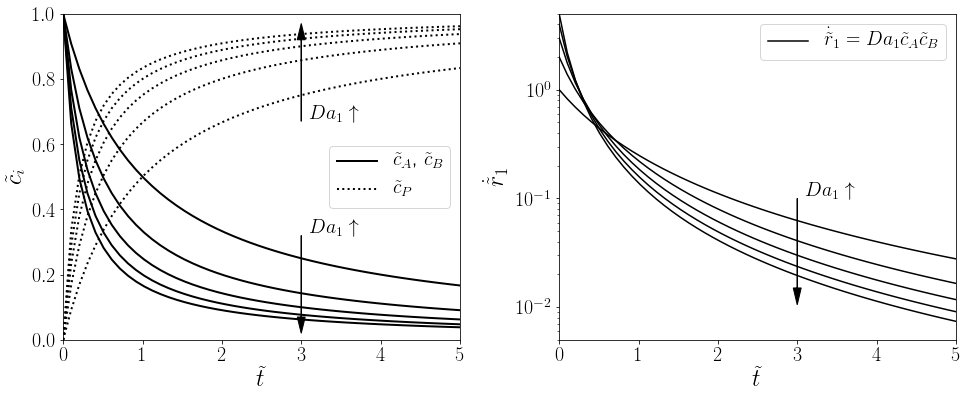

In [20]:
k = np.linspace(1, 5, 5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(hm.figure_width, 6))

for index, value in enumerate(k):
    solution = odeint(func=single_reaction_rhs, y0=[c_A0, c_B0, c_P0], t=t_steps, args=(value, alpha_11, alpha_21))
    if index == 0:
        ax1.plot(t_steps, solution[:,0], c='k', ls='-', lw=lw, label=r"$\tilde{c}_A$, $\tilde{c}_B$")
        ax1.plot(t_steps, solution[:,2], c='k', ls=':', lw=lw, label=r"$\tilde{c}_P$")
        ax2.plot(t_steps, np.multiply(solution[:,0], solution[:,1]) * value, c='k', ls='-', label=r"$\dot{\tilde{r}}_1=Da_1 \tilde{c}_A \tilde{c}_B$")
    
    else:
        ax1.plot(t_steps, solution[:,0], ls='-', lw=lw, c='k')
        ax1.plot(t_steps, solution[:,2], ls=':', lw=lw, c='k')
        ax2.plot(t_steps, np.multiply(solution[:,0], solution[:,1]) * value, c='k', ls='-')
    
ax1.set_xlabel(r"$\tilde{t}$", fontsize=hm.fontsize_label)
ax1.set_ylabel(r"$\tilde{c}_i$", fontsize=hm.fontsize_label)
ax1.set_xlim([0, 5])
ax1.set_ylim([0, 1])
ax1.arrow(3, 0.67, 0, 0.25, head_width=0.1, head_length=0.05, fc='k', ec='k')
ax1.text(3.1, 0.67, r"$Da_1\uparrow$", fontsize=hm.fontsize_legend)
ax1.arrow(3, 0.32, 0, -0.25, head_width=0.1, head_length=0.05, fc='k', ec='k')
ax1.text(3.1, 0.32, r"$Da_1\uparrow$", fontsize=hm.fontsize_legend)
ax1.legend(fontsize=hm.fontsize_legend)
ax2.set_xlabel(r"$\tilde{t}$", fontsize=hm.fontsize_label)
ax2.set_ylabel(r"$\dot{\tilde{r}}_1$", fontsize=hm.fontsize_label)
ax2.set_xlim([0, 5])
ax2.set_ylim([0.005, 5])
ax2.arrow(3, 0.1, 0, -0.085, head_width=0.1, head_length=0.0045, fc='k', ec='k')
ax2.text(3.1, 0.1, r"$Da_1\uparrow$", fontsize=hm.fontsize_legend)
ax2.legend(fontsize=hm.fontsize_legend)
ax2.set_yscale('log')
ax1.tick_params(labelsize=hm.fontsize_tick)
ax2.tick_params(labelsize=hm.fontsize_tick)
fig.subplots_adjust(wspace=0.25)
fig.savefig('../output/single_reaction_ode_da_influence.pdf', bbox_inches='tight')
fig.savefig('../output/single_reaction_ode_da_influence.png', bbox_inches='tight')

### Influence of the educt ratio

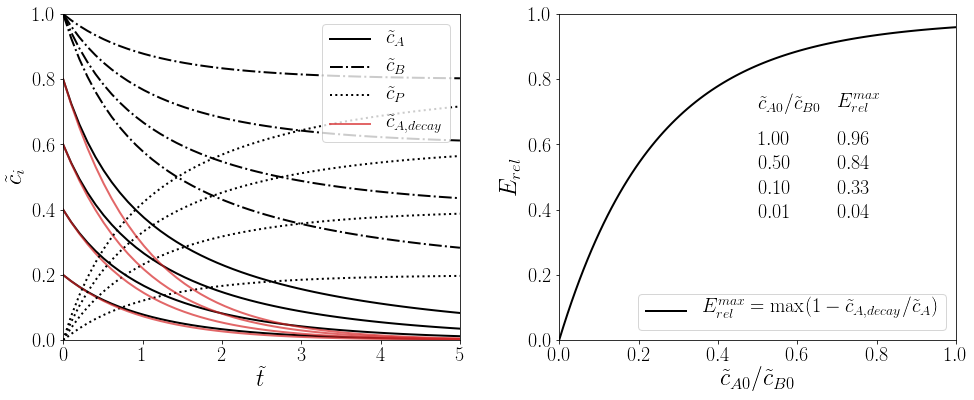

In [27]:
initial_A = np.linspace(0.2, 0.8, 4)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(hm.figure_width, 6))

for index, value in enumerate(initial_A):
    solution = odeint(func=single_reaction_rhs, y0=[value, c_B0, c_P0], t=t_steps, args=(1.0, 1.0, 1.0))
    if index == 0:
        ax1.plot(t_steps, solution[:,0], c='k', ls='-', lw=lw, label=r"$\tilde{c}_A$")
        ax1.plot(t_steps, solution[:,1], c='k', ls='-.', lw=lw, label=r"$\tilde{c}_B$")
        ax1.plot(t_steps, solution[:,2], c='k', ls=':', lw=lw, label=r"$\tilde{c}_P$")
        ax1.plot(t_steps, first_order_analytical_A(t_steps, 1.0, value), lw=lw, c='C3', alpha=0.7, label=r"$\tilde{c}_{A,decay}$")
    else:
        ax1.plot(t_steps, solution[:,0], c='k', ls='-', lw=lw)
        ax1.plot(t_steps, solution[:,1], c='k', ls='-.', lw=lw)
        ax1.plot(t_steps, solution[:,2], c='k', ls=':', lw=lw)
        ax1.plot(t_steps, first_order_analytical_A(t_steps, 1.0, value), lw=lw, c='C3', alpha=0.7)
        
ratioAB = np.linspace(0.001, 1.0, 100)
maxDev = np.zeros(100)
for index, ratio in enumerate(ratioAB):
    solution = odeint(func=single_reaction_rhs, y0=[c_B0*ratio, c_B0, c_P0], t=t_steps, args=(1.0, 1.0, 1.0))
    decay  = first_order_analytical_A(t_steps, 1.0, c_B0*ratio)
    maxDev[index] = np.amax( np.absolute( (solution[:,0]-decay) / solution[:,0] ) )
    
ax2.plot(ratioAB, maxDev, c='k', ls='-', lw=lw, label=r'$E_{rel}^{max} = \mathrm{max}(1-\tilde{c}_{A,decay}/\tilde{c}_A)$')

# compute some values
ratio_0 = 0.01
ratio_1 = 0.1
ratio_2 = 0.5
ratio_3 = 1.0
solution_0 = odeint(func=single_reaction_rhs, y0=[c_B0*ratio_0, c_B0, c_P0], t=t_steps, args=(1.0, 1.0, 1.0))
solution_1 = odeint(func=single_reaction_rhs, y0=[c_B0*ratio_1, c_B0, c_P0], t=t_steps, args=(1.0, 1.0, 1.0))
solution_2 = odeint(func=single_reaction_rhs, y0=[c_B0*ratio_2, c_B0, c_P0], t=t_steps, args=(1.0, 1.0, 1.0))
solution_3 = odeint(func=single_reaction_rhs, y0=[c_B0*ratio_3, c_B0, c_P0], t=t_steps, args=(1.0, 1.0, 1.0))
decay_0  = first_order_analytical_A(t_steps, 1.0, c_B0*ratio_0)
decay_1  = first_order_analytical_A(t_steps, 1.0, c_B0*ratio_1)
decay_2  = first_order_analytical_A(t_steps, 1.0, c_B0*ratio_2)
decay_3  = first_order_analytical_A(t_steps, 1.0, c_B0*ratio_3)
maxDev_0 = np.amax( np.absolute( (solution_0[:,0]-decay_0) / solution_0[:,0] ) )
maxDev_1 = np.amax( np.absolute( (solution_1[:,0]-decay_1) / solution_1[:,0] ) )
maxDev_2 = np.amax( np.absolute( (solution_2[:,0]-decay_2) / solution_2[:,0] ) )
maxDev_3 = np.amax( np.absolute( (solution_3[:,0]-decay_3) / solution_3[:,0] ) )


ax1.set_xlabel(r"$\tilde{t}$", fontsize=hm.fontsize_label)
ax1.set_ylabel(r"$\tilde{c}_i$", fontsize=hm.fontsize_label)
ax1.set_xlim([0, 5])
ax1.set_ylim([0.0, 1.0])
ax1.legend(loc=1, fontsize=hm.fontsize_legend)

ax2.set_xlabel(r"$\tilde{c}_{A0} / \tilde{c}_{B0}$", fontsize=hm.fontsize_label)
ax2.set_ylabel(r"$E_{rel}$", fontsize=hm.fontsize_label)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.text(0.5, 0.7, r"$\tilde{c}_{A0}/\tilde{c}_{B0}$", fontsize=hm.fontsize_legend)
ax2.text(0.5, 0.6, r"$1.00$", fontsize=hm.fontsize_legend)
ax2.text(0.5, 0.525, r"$0.50$", fontsize=hm.fontsize_legend)
ax2.text(0.5, 0.45, r"$0.10$", fontsize=hm.fontsize_legend)
ax2.text(0.5, 0.375, r"$0.01$", fontsize=hm.fontsize_legend)
ax2.text(0.7, 0.7, r"$E_{rel}^{max}$", fontsize=hm.fontsize_legend)
ax2.text(0.7, 0.6, r"${:1.2f}$".format(maxDev_3), fontsize=hm.fontsize_legend)
ax2.text(0.7, 0.525, r"${:1.2f}$".format(maxDev_2), fontsize=hm.fontsize_legend)
ax2.text(0.7, 0.45, r"${:1.2f}$".format(maxDev_1), fontsize=hm.fontsize_legend)
ax2.text(0.7, 0.375, r"${:1.2f}$".format(maxDev_0), fontsize=hm.fontsize_legend)
ax2.legend(fontsize=hm.fontsize_legend)
ax1.tick_params(labelsize=hm.fontsize_tick)
ax2.tick_params(labelsize=hm.fontsize_tick)
fig.subplots_adjust(wspace=0.25)
fig.savefig('../output/single_reaction_ode_ratioAB.pdf', bbox_inches='tight')
fig.savefig('../output/single_reaction_ode_ratioAB.png', bbox_inches='tight')

## Results for a competitive-consecutive reaction
### Influence of reaction rate ratio

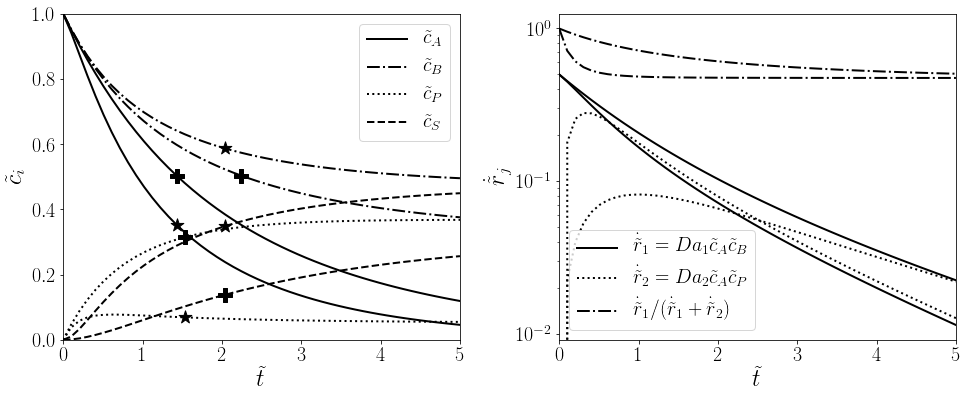

In [75]:
# k_12 = k_1/k_2
k_12 = np.asarray([0.1, 1.0])
k_1 = 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(hm.figure_width, 6))

marker = ["*", "P", "."]

for index, ratio in enumerate(k_12):
    solution = odeint(func=consecutive_reaction_rhs, y0=[c_A0, c_B0, c_P0, c_S0], t=t_steps, args=(k_1, k_1/ratio, alpha_11, alpha_21, alpha_21, alpha_32))
    if index == 0:
        ax1.plot(t_steps, solution[:,0], c='k', ls='-', lw=lw, label=r"$\tilde{c}_A$")
        ax1.plot(t_steps, solution[:,1], c='k', ls='-.', lw=lw, label=r"$\tilde{c}_B$")
        ax1.plot(t_steps, solution[:,2], c='k', ls=':', lw=lw, label=r"$\tilde{c}_P$")
        ax1.plot(t_steps, solution[:,3], c='k', ls='--', lw=lw, label=r"$\tilde{c}_S$")
        ax1.scatter(t_steps[14], solution[14,0], c='k', s=180, marker=marker[index])
        ax1.scatter(t_steps[20], solution[20,1], c='k', s=180, marker=marker[index])
        ax1.scatter(t_steps[15], solution[15,2], c='k', s=180, marker=marker[index])
        ax1.scatter(t_steps[20], solution[20,3], c='k', s=180, marker=marker[index])
        r_1 = np.multiply(solution[:,0], solution[:,1])*k_1
        r_2 = np.multiply(solution[:,0], solution[:,2])*k_1/ratio
        ax2.plot(t_steps, r_1, c='k', ls='-', lw=lw, label=r"$\dot{\tilde{r}}_1=Da_1 \tilde{c}_A \tilde{c}_B$")
        ax2.plot(t_steps, r_2, c='k', ls=':', lw=lw, label=r"$\dot{\tilde{r}}_2=Da_2 \tilde{c}_A \tilde{c}_P$")
        ax2.plot(t_steps, r_1/(r_1 + r_2), c='k', ls='-.', lw=lw, label=r"$\dot{\tilde{r}}_1 / (\dot{\tilde{r}}_1 + \dot{\tilde{r}}_2)$")
        #ax1.scatter(t_steps[20], r_1[], c='k', s=180, marker=marker[index])
        #ax1.scatter(t_steps[15], solution[15,2], c='k', s=180, marker=marker[index])
        #ax1.scatter(t_steps[20], solution[20,3], c='k', s=180, marker=marker[index])
    
    else:
        ax1.plot(t_steps, solution[:,0], ls='-', lw=lw, c='k')
        ax1.plot(t_steps, solution[:,1], ls='-.', lw=lw, c='k')
        ax1.plot(t_steps, solution[:,2], ls=':', lw=lw, c='k')
        ax1.plot(t_steps, solution[:,3], ls='--', lw=lw, c='k')
        ax1.scatter(t_steps[14], solution[14,0], c='k', s=180, marker=marker[index])
        ax1.scatter(t_steps[20+index*2], solution[20+index*2,1], c='k', s=180, marker=marker[index])
        ax1.scatter(t_steps[15], solution[15,2], c='k', s=180, marker=marker[index])
        ax1.scatter(t_steps[20], solution[20,3], c='k', s=180, marker=marker[index])
        r_1 = np.multiply(solution[:,0], solution[:,1])*k_1
        r_2 = np.multiply(solution[:,0], solution[:,2])*k_1/ratio
        ax2.plot(t_steps, r_1, c='k', ls='-', lw=lw)
        ax2.plot(t_steps, r_2, c='k', ls=':', lw=lw)
        ax2.plot(t_steps, r_1/(r_1 + r_2), c='k', ls='-.', lw=lw)
    
ax1.set_xlabel(r"$\tilde{t}$", fontsize=hm.fontsize_label)
ax1.set_ylabel(r"$\tilde{c}_i$", fontsize=hm.fontsize_label)
ax1.set_xlim([0, 5])
ax1.set_ylim([0, 1])
ax1.legend(fontsize=hm.fontsize_legend)
ax2.set_xlabel(r"$\tilde{t}$", fontsize=hm.fontsize_label)
ax2.set_ylabel(r"$\dot{\tilde{r}}_j$", fontsize=hm.fontsize_label)
ax2.set_xlim([0, 5])
ax2.legend(fontsize=hm.fontsize_legend)
ax2.set_yscale('log')
ax1.tick_params(labelsize=hm.fontsize_tick)
ax2.tick_params(labelsize=hm.fontsize_tick)
fig.subplots_adjust(wspace=0.25)
fig.savefig('../output/consecutive_reaction_ode_da.pdf', bbox_inches='tight')
fig.savefig('../output/consecutive_reaction_ode_da.png', bbox_inches='tight')

### Influence of initial product concentration

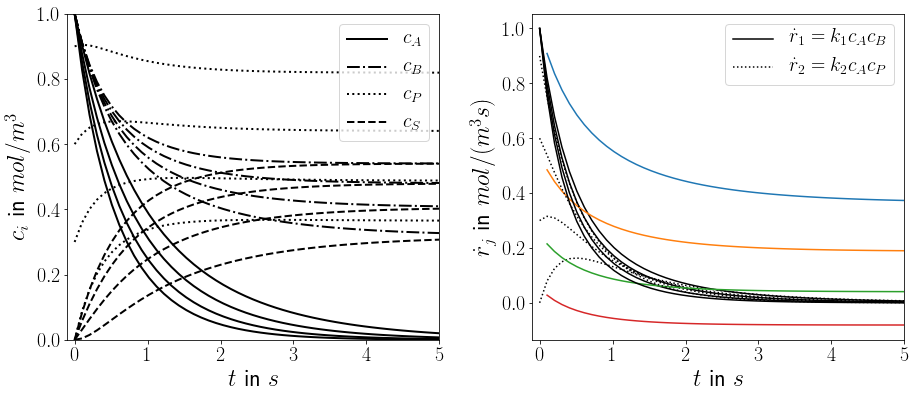

In [34]:
# k_12 = k_1/k_2
initial_P = np.linspace(0, 0.9, 4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
for index, P0 in enumerate(initial_P):
    solution = odeint(func=consecutive_reaction_rhs, y0=[c_A0, c_B0, P0, c_S0], t=t_steps, args=(1.0, 1.0, alpha_11, alpha_21, alpha_21, alpha_32))
    if index == 0:
        ax1.plot(t_steps, solution[:,0], c='k', ls='-', lw=lw, label="$c_A$")
        ax1.plot(t_steps, solution[:,1], c='k', ls='-.', lw=lw, label="$c_B$")
        ax1.plot(t_steps, solution[:,2], c='k', ls=':', lw=lw, label="$c_P$")
        ax1.plot(t_steps, solution[:,3], c='k', ls='--', lw=lw, label="$c_S$")
        ax2.plot(t_steps, np.multiply(solution[:,0], solution[:,1]), c='k', ls='-', label="$\dot{r}_1=k_1 c_A c_B$")
        ax2.plot(t_steps, np.multiply(solution[:,0], solution[:,2]), c='k', ls=':', label="$\dot{r}_2=k_2 c_A c_P$")
        ax2.plot(t_steps[1:], (solution[1:,2]-P0) / (c_A0-solution[1:,0]))
    
    else:
        ax1.plot(t_steps, solution[:,0], ls='-', lw=lw, c='k')
        ax1.plot(t_steps, solution[:,1], ls='-.', lw=lw, c='k')
        ax1.plot(t_steps, solution[:,2], ls=':', lw=lw, c='k')
        ax1.plot(t_steps, solution[:,3], ls='--', lw=lw, c='k')
        ax2.plot(t_steps, np.multiply(solution[:,0], solution[:,1]), c='k', ls='-')
        ax2.plot(t_steps, np.multiply(solution[:,0], solution[:,2]), c='k', ls=':')
        ax2.plot(t_steps[1:], (solution[1:,2]-P0) / (c_A0-solution[1:,0]))
    
ax1.set_xlabel(r"$t$ in $s$")
ax1.set_ylabel(r"$c_i$ in $mol/m^3$")
ax1.set_xlim([-0.1, 5])
ax1.set_ylim([0, 1])
#ax1.arrow(3, 0.67, 0, 0.25, head_width=0.1, head_length=0.05, fc='k', ec='k')
#ax1.text(3.1, 0.67, r"$k\uparrow$")
#ax1.arrow(3, 0.32, 0, -0.25, head_width=0.1, head_length=0.05, fc='k', ec='k')
#ax1.text(3.1, 0.32, r"$k\uparrow$")
ax1.legend()
ax2.set_xlabel(r"$t$ in $s$")
ax2.set_ylabel(r"$\dot{r}_j$ in $mol/(m^3s)$")
ax2.set_xlim([-0.1, 5])
#ax2.set_ylim([0.005, 5])
#ax2.arrow(3, 0.1, 0, -0.085, head_width=0.1, head_length=0.0045, fc='k', ec='k')
#ax2.text(3.1, 0.1, r"$k\uparrow$")
ax2.legend()
#ax2.set_yscale('log')
fig.subplots_adjust(wspace=0.25)
fig.savefig('../output/consecutive_reaction_initial_product.pdf', bbox_inches='tight')